In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Traing & Testing Data Array

In [2]:
img_data = np.random.randn(250000,1)
img_hat = np.random.randn(250000,1)


## Show Training Picture && Get Data

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:18: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:20: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:22: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:23: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:24: DeprecationWarning: using a non-integer number instead of an integer will r

250000


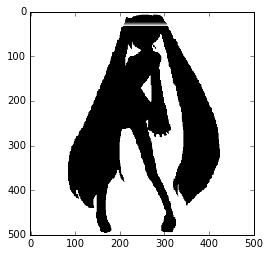

In [3]:
muki = np.zeros((500,500,3))
muki.fill(1)
plt.imshow(muki)

import random

f = open('./muki.txt','rb')
count = 0
for line in f:
    y,x,c = line.split()
    x = (float(x) )*100. + 250
    y = (float(y) )*100. + 250
    c = float(c)
    
    img_data[count] = c
    
    if c == 0 :
        muki[x][y][0] = 1#random.random()
        muki[x][y][1] = 1#random.random()
        muki[x][y][2] = 1#random.random()        
    else:
        muki[x][y][0] = 255#random.random()
        muki[x][y][1] = 0#random.random()
        muki[x][y][2] = 0#random.random()
    count += 1
#     print x ,y 
#     if count > 10000 : break
plt.imshow(muki)
print count


In [4]:
import numpy as np
import theano 
import theano.tensor as T

ERROR (theano.sandbox.cuda): nvcc compiler not found on $PATH. Check your nvcc installation and try again.


## Muki NN
<img width=500px src='./muki_nn.png' />

In [5]:
x = T.matrix(name='x',dtype='float32')
y = T.matrix(name='x',dtype='float32')

In [6]:
w1 = theano.shared(np.random.randn(128,250000))
b1 = theano.shared(np.random.randn(128))
w2 = theano.shared(np.random.randn(250000,128))
b2 = theano.shared(np.random.randn(250000))

## 需採用 dimshuffle
* 請參考 ?b1.dimshuffle()

In [7]:
z1 = T.dot(w1,x) + b1.dimshuffle(0,'x')

In [8]:
a1 = 1/(1+T.exp(-z1))

## 輸出第一層

In [9]:
fa1 = theano.function(inputs=[x],outputs=[a1],allow_input_downcast=True)
fa1(np.random.randn(250000,1))

[array([[  1.56017964e-181],
        [  1.19529311e-048],
        [  1.48989046e-162],
        [  8.27906975e-082],
        [  3.03025839e-053],
        [  1.00000000e+000],
        [  1.10863970e-110],
        [  9.14591620e-212],
        [  1.00000000e+000],
        [  1.04986434e-158],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  1.95860728e-010],
        [  1.00000000e+000],
        [  1.06546212e-166],
        [  4.20434214e-173],
        [  6.35468722e-001],
        [  0.00000000e+000],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  9.99999909e-001],
        [  1.00000000e+000],
        [  1.39900748e-056],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  4.34008440e-231],
        [  9.99878454e-001],
        [  1.32599896e-121],
        [  8.20985075e-015],
        [  1.00000000e+000],
        [  1.70963787e-077],
        [  1.00000000e+000],
        [  1.00000000e+000],
        [  5.5

In [10]:
z2 = T.dot(w2,a1) + b2.dimshuffle(0,'x')
a2 = 1/(1+T.exp(-z2))
fa2 = theano.function(inputs=[x],outputs=[a2],allow_input_downcast=True)

## 輸出第二層

In [11]:
fa2(np.random.randn(250000,1))[0]

array([[  5.19197895e-04],
       [  9.92725141e-01],
       [  9.99336571e-01],
       ..., 
       [  1.38755491e-03],
       [  9.99998723e-01],
       [  2.98336350e-02]])

In [12]:
y_hat = T.matrix('reference',dtype='float32')
cost = T.sum((a2-y_hat)**2)/250000

In [13]:
dw1,db1,dw2,db2 = theano.grad(cost,[w1,b1,w2,b2])

In [14]:

def Myupdates(ps,gs):
    from itertools import izip
 
    r = 1
    pu = [ (p,p-r*g) for p,g in izip(ps,gs)   ]
    return pu

In [26]:
train = theano.function(inputs=[x,y_hat],
                        outputs=[a2,cost],
                        updates=Myupdates([w1,b1,w2,b2],[dw1,db1,dw2,db2]),
                        allow_input_downcast=True,)



In [27]:
img_predict,cost_predict = train(img_data,img_hat)
print cost_predict

0.45419874991


In [29]:

img_hat = img_data
for i in range(10):
    img_predict,cost_predict = train(img_data,img_hat)
    if i%2 == 0:
        print cost_predict

0.453660017596
0.453632815155
0.453643801177
0.45365839559
0.453626019807


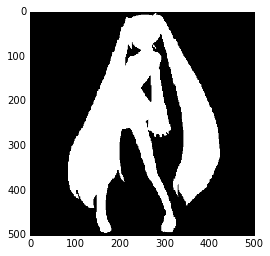

In [31]:

def showimg(img):
    muki_pr = np.zeros((500,500,3))
    l =img.tolist()
    count = 0
    for x in range(500):
        for y in range(500):
            muki_pr[y][x] = l[count]
            count += 1
    plt.imshow(muki_pr)
    
showimg(img_data)


## 將結果輸出成圖片

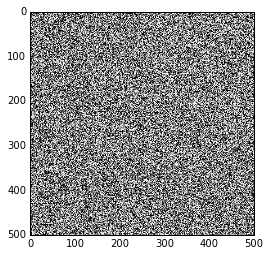

In [32]:
showimg(img_predict)

# 結論: 學習出來的結果蠻糟的，且速度非常慢
* 以一張圖作為一個 instance 的話 input array 過於長會產生下列的問題
* Weight 的數量過多 :  input_size x l1_size + l1_size x hd_size 
* 所以 Training 需要耗費大量的時間

In [33]:
500**2*128 + 128*500**2

64000000